In [4]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
warnings.filterwarnings("ignore")
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [5]:
data = 'data/Sample_Data.xls'

In [6]:
df = pd.read_excel(data)

### Historical Analysis

In [4]:
print (df.columns.values)

['Row ID' 'Order ID' 'Order Date' 'Ship Date' 'Ship Mode' 'Customer ID'
 'Customer Name' 'Segment' 'Country' 'City' 'State' 'Postal Code' 'Region'
 'Product ID' 'Category' 'Sub-Category' 'Product Name' 'Sales' 'Quantity'
 'Discount' 'Profit']


In [5]:
print ('Strating Date : ' + str(df['Order Date'].min()), '\nEnding Date : ' + str(df['Order Date'].max()))

Strating Date : 2014-01-03 00:00:00 
Ending Date : 2017-12-30 00:00:00


In [7]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [8]:
df_analysis = df[df['Category'] == 'Furniture'][['Sales', 'Order Date']]

In [9]:
df_analysis = df_analysis.groupby('Order Date')['Sales'].sum().reset_index()

In [10]:
df_analysis = df_analysis.set_index('Order Date')
df_analysis.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

#### Frequencies to Plot Historical Data
B         business day frequency <br/>
C         custom business day frequency (experimental) <br/>
D         calendar day frequency <br/>
W         weekly frequency <br/>
M         month end frequency <br/>
SM        semi-month end frequency (15th and end of month) <br/>
BM        business month end frequency <br/>
CBM       custom business month end frequency <br/>
MS        month start frequency <br/>
SMS       semi-month start frequency (1st and 15th)<br/>
BMS       business month start frequency<br/>
CBMS      custom business month start frequency<br/>
Q         quarter end frequency<br/>
BQ        business quarter endfrequency<br/>
QS        quarter start frequency<br/>
BQS       business quarter start frequency<br/>
A         year end frequency<br/>
BA, BY    business year end frequency<br/>
AS, YS    year start frequency<br/>
BAS, BYS  business year start frequency<br/>
BH        business hour frequency<br/>
H         hourly frequency<br/>
T, min    minutely frequency<br/>
S         secondly frequency<br/>
L, ms     milliseconds<br/>
U, us     microseconds<br/>
N         nanoseconds<br/>

In [35]:
y = df_analysis['Sales'].resample('MS').mean()

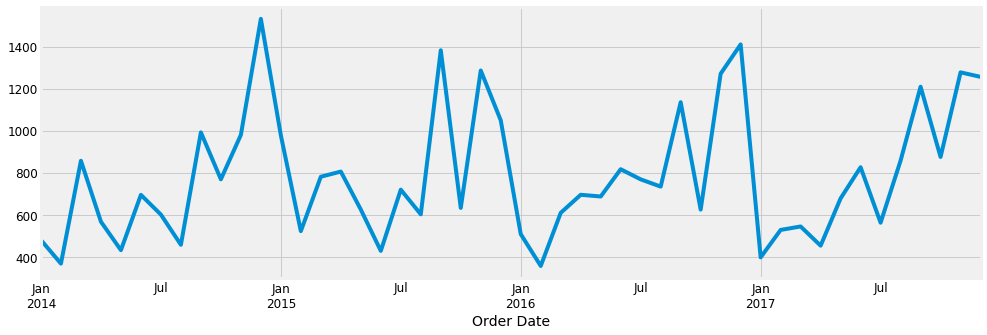

In [36]:
y.plot(figsize=(15, 5))

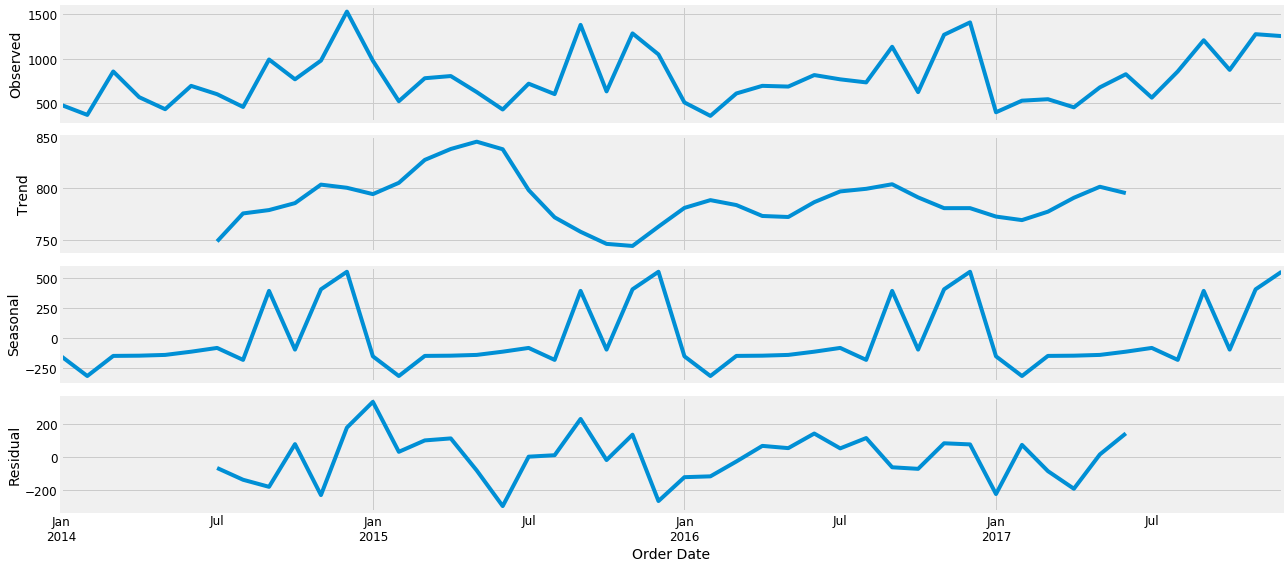

In [37]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()

### Forecasting

In [38]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [39]:
# Using Grid Search for parameter selection for ARIMA Time Series Model
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205916
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1576.7324642473277
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.71701309202774
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.23144334183365
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1478.1277236759956
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758104
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2786.7230874852653
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091505
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.59412606125284
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2768.427220528199
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.98848769468674
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1378.5486237111134
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785671879367
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1022.8611228052164
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211

In [40]:
# Fitting the ARIMA model
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -144.894
Date:                            Wed, 16 Oct 2019   AIC                            297.788
Time:                                    11:42:41   BIC                            302.152
Sample:                                01-01-2014   HQIC                           298.816
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360   

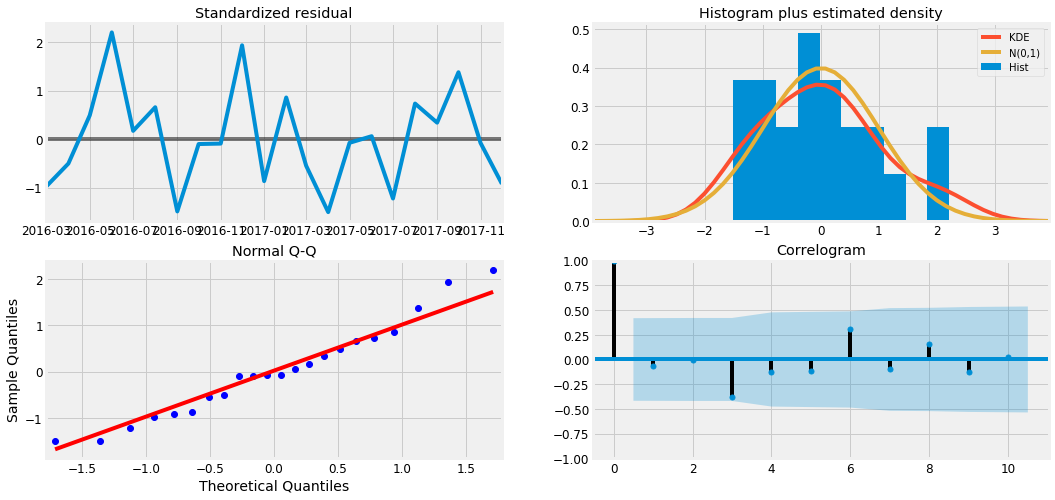

In [41]:
# Running Diagnostics on the Trained Model
fig = results.plot_diagnostics(figsize=(16, 8))

### Validating forecasts

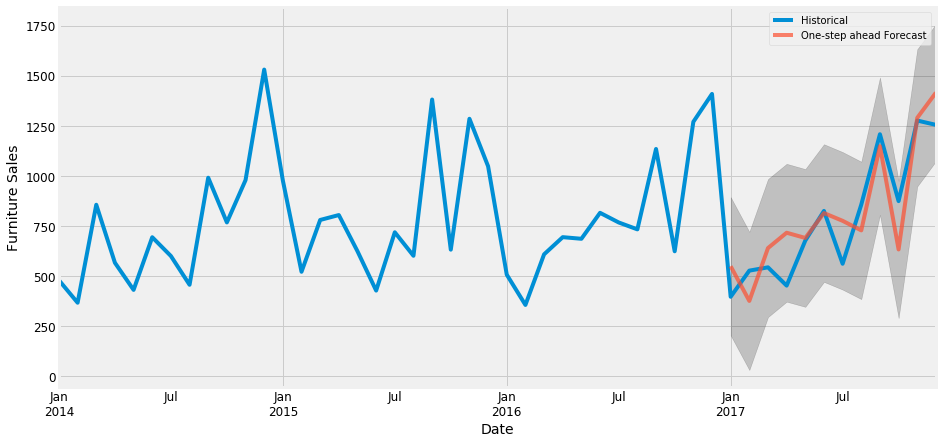

In [43]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='Historical')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

### Predictions

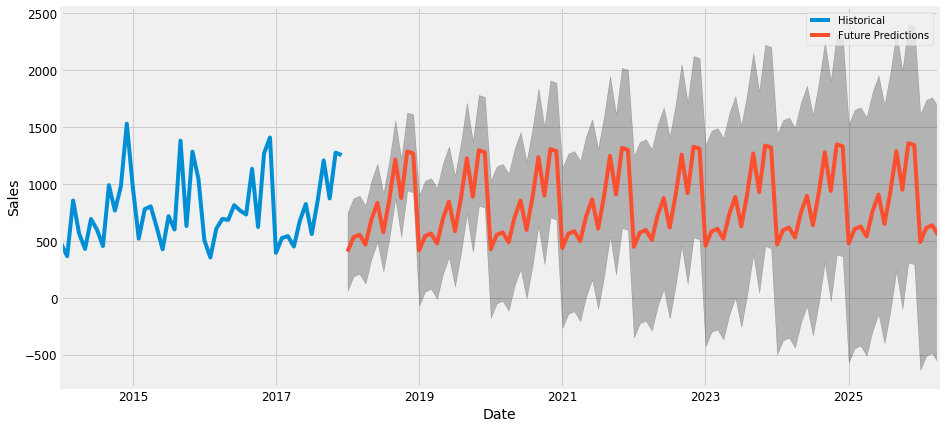

In [44]:
step_count = 100
pred_uc = results.get_forecast(steps=step_count)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='Historical', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Future Predictions')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()